# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [ 3, 4]].values

## Using the elbow method to find the optimal number of clusters

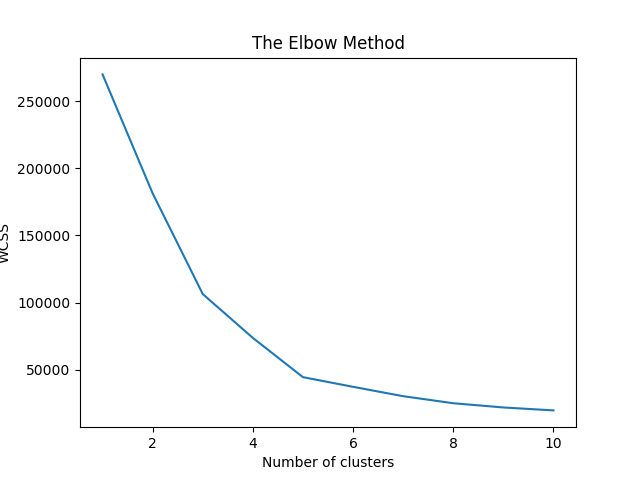

In [33]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [34]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

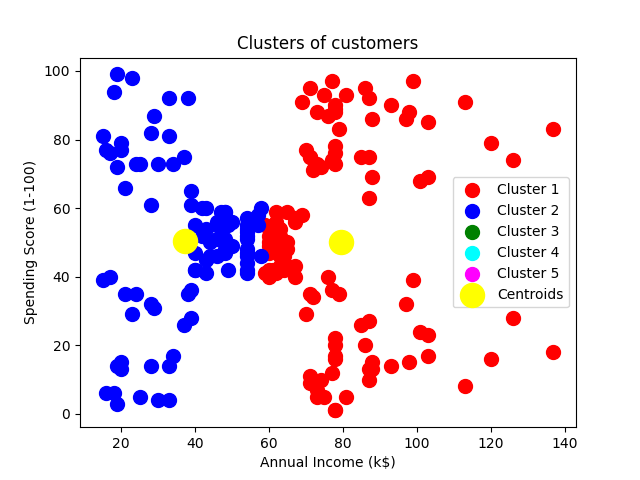

In [35]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [8]:
print(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1])

[19 20 31 35 64 67 58 37 35 52 35 46 54 45 40 60 53 49 42 36 65 48 49] [15 16 17 18 19 19 20 20 21 23 24 25 28 28 29 30 33 33 34 37 38 39 39]


In [23]:
print(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1])

[15 16 17 18 19 19 20 20 21 23 24 25 28 28 29 30 33 33 34 37 38 39] [81 77 76 94 72 99 77 79 66 98 73 73 82 61 87 73 92 81 73 75 92 65]


In [24]:
kmeans.predict([[15, 81]])

array([7])

In [64]:
true_dataset = pd.read_csv('Mall_Customers_cls_1.csv')

In [65]:
true_dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5,Unnamed: 6
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,2
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,0,1


In [67]:
clusters = true_dataset.iloc[:,6].values
print(clusters)

[1 1 2 1 1 1 2 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 2 1 2
 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 2 1 1 1 1 2 1 1 2 2 1 2 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 1 2 2 2 1 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [68]:
from sklearn import metrics
metrics.rand_score(clusters, y_kmeans)

0.6132663316582915